<b><h1><center><font size="6">Chest X-Ray (Pneumonia) Binary Classification: <br> - CNN with Transfer Learning <br> (Tensorflow 2.0 & Keras)</font></center></h1></b>

![](https://www.collinsdictionary.com/images/full/xray_560923156_1000.jpg)

## <b>1. | Introduction</b> 👋
  * Problem Overview 👨‍💻 </br>
    * 👉 The <mark><b>goal of this notebook</mark></b> is to <mark><b>determine which samples are from patients with Pneumonia</mark></b>.
    * 👉 The objective: <mark><b>train a convolutional neural network (CNN) able to successfully classify the chest X-ray images whether the result is NORMAL or PNEMONIA</b></mark>.
    * 👉 Therefore, <mark><b>it is a binary classification</b></mark>.
  * Dataset Description 🤔 </br>
    * 👉 The <mark><b>Chest X-ray Images Dataset is taken from Kaggle Dataset</b></mark>, <a href="https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images">Chest X-ray Images</a>.
    * 👉 This Dataset <mark><b>provides train folder and test folder with inside each folder has both NORMAL folder and PNEUMONIA folder respectively.</b></mark>.
    * <mark><b>Chest X-ray images (anterior-posterior)</mark></b> were <mark><b>selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children's Medical Center, Guangzhou</mark></b>. All chest X-ray imaging was <mark><b>performed as part of patients' routine clinical care</mark></b>.
    * For <mark><b>the analysis of chest x-ray images</mark></b>, <mark><b>all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans</mark></b>.
    * The <mark><b>diagnoses for the images</mark></b> were then <mark><b>graded by two expert physicians before being cleared for training the AI system</mark></b>. In order <mark><b>to account for any grading errors</mark></b>, the <mark><b>evaluation set was also checked by a third expert</mark></b>.
  * Analysis Introduction 🔎 </br>
    * 👉 In our case, with using <a href="https://www.image-net.org/">ImageNet</a> dataset, with <mark><b>more than 14 million images have been hand-annotated by the project to indicate what objects are pictured</mark></b>, in <mark><b>at least one million of the images, bounding boxes are also provided</mark></b> and <mark><b>contains more than 20,000 categories consisting of several hundred images for 1000 classes</mark></b>. This means that we <mark><b>can pick any CNN trained using ImageNet to get a warm start at training our own model</b></mark>.
    * 👉 <a href="https://en.wikipedia.org/wiki/Residual_neural_network">ResNet50</a> is a somewhat old, but still very popular, CNN. Its <mark><b>popularity come from the fact that it was the CNN that introduced the residual concept in deep learning</mark></b>. It <mark><b>also won the</mark></b> <a href="https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8">ILSVRC 2015</a> <mark><b>image classification contest</mark></b>. Since it is a well-known and very solid CNN, we decided to use it for our transfer learning task.
    * 👉 As the <mark><b>original ResNet50V2 was trained on ImageNet</mark></b>, <mark><b>its last layer outputs 1000 probabilities for a tested image to belong to the 1000 different ImageNet classes</mark></b>. Therefore, we <mark><b>cannot directly use it in our binary classification problem with only chest X-ray NORMAL and PNEUMONIA as classes</mark></b>.
    * 👉 Here we try <mark><b>2 approaches from transfer learning and compare their performances</mark></b>:
      > - <mark><b>using a pretrained model with frozing the base ResNet50V2 weights of its fully connected layers</mark></b> as the <mark><b>base for feature extraction</mark></b> and then <mark><b>add new layers and train them without changing anything in the convolutional section of the network</mark></b>.
      > - <mark><b>Fine Tuning, unfreezing the last layers of the pretrained model</mark></b> and then <mark><b>add new layers and train them in the convolutional section of the network</mark></b>.
    * 👉 In this case, <mark><b>the convolutional section becomes just an image feature extractor</mark></b> and <mark><b>the actual job of classifying the features is performed by the newly added fully connected layers</mark></b>.
  * Methods 🧾 </br>
    * Load a ResNet50V2 model trained using the ImageNet dataset.
    * 👉 <mark><b>Preprocess Images with Keras Image Data Generator</b></mark>,
      > - can <b><mark>rescale the pixel values</b></mark>
      > - can <b><mark>apply random transformation techniques for data augmentation on the fly</b></mark>.
      > - <b><mark>define two different generators</b></mark>,
        >> - The <b><mark>train_datagen<b><mark> includes <b><mark>some transformations to augment the train set</b></mark>.
        >> - The <b><mark>val_datagen<b><mark> is used to <b><mark>simply rescale the validation and test sets</b></mark>.
      > - <b><mark>apply those generators on each dataset using the flow_from_dataframe method</b></mark>.
      > - Apart from the transformations defined in each generator, <b><mark>the images are also resized based on the target_size set.</b></mark>.
    * During training process, we have applied some techniques like
      - 1st approach: Transfer Learning ResNet50V2 with all Frozen Fully Connected Layers
        - using image size of (224, 224, 3), BATCH_SIZE=128 and EPOCH=50.
        - adding global average pooling 2D layers to reduces the spatial dimensions to 1x1 while retaining the depth.
        - adding 10% dropout on input activation layers
        - utilizing Adam optimizer
        - monitoring validation loss using EarlyStopping at patience=5
        - monitoring validation loss using ReduceLROnPlateau at patience=2
      - 2nd approach: Transfer Learning ResNet50V2 with Fine-Tuning Selected Fully Connected Layers
        - using image size of (224, 224, 3) and EPOCH=50.
        - <mark><b>reducing the BATCH_SIZE from 128 to 32.</mark></b>
        - <mark><b>adding batch normalization layers</mark></b> to standardize the input and normalize hidden units of each prior layer of activation layers of a neural network by adjusting and scaling the activations and help reduce problem of covariant shift.
        - adding global average pooling 2D layers to reduces the spatial dimensions to 1x1 while retaining the depth.
        - adding 10% dropout on input activation layers
        - <mark><b>applying learning scheduler on Adam optimizer</mark></b>
        - monitoring validation loss using <mark><b>EarlyStopping with changing patience 5 to 15</mark></b>.
        - monitoring validation loss using <mark><b>ReduceLROnPlateau with changing patience 2 to 5</mark></b>.
    * Lastly, we can use the trained ResNet52V2 to predict the class of the preprocessed image.


## <b>2. | Accuracy of Best Model</b> 🧪
* Transfer Learning ResNet50V2 with all Frozen Fully Connected Layers
  - Training Accuracy achieved: 93.95%
  - Validation Accuracy achieved: 95.12%
  - Test F1 Score: 94.0%
* Transfer Learning ResNet50V2 with Fine-Tuning Selected Fully Connected Layers
  - Training Accuracy achieved: 97.94%
  - Validation Accuracy achieved:96.65%
  - Test F1 Score: 97.6%

## <b>3. | Conclusiion </b> 📤
* In this study respectively,
* With this transferred ResNet50V2, we can perform tests using any images having 224x224 resolution.
* The fine-tuning approach had reached the best score.
* Both 1st approach and 2nd approach trained models were quite generalized as their the differences between train loss and validation loss are small.
* The 2nd approach obviously outperforms 1st approach with 2nd approach's f1_score=97.6% and 1st approach's f1 score=94.0% respectively.
  > This further proves although we can make use of Resnet50V2 transfer learning's weights for higher start, greater slope and greater asymptotes, still needed with fine-tuning layers to adapt domains' information that not seen by models trained on 'imagenet' to reach better performance.
* The recall was close to 100%.
* Even without expertise on the medical field, it's reasonable to assume that false negatives are more 'costly' than false positives in this case.
* Reaching such recall with a relatively small dataset for training as this one, while also reaching a pretty good recall, is a good indicative of the model's capabilities confirmed by the high ROC-AUC value and double confirmed by high AUC value under precision recall curve for this small and unbalanced dataset.
* Correct predictions on some test images samples.

## <b>5. | Reference</b> 🔗
<ul><b><u>Github Notebook 📚</u></b>
        <li> <a style="color: #3D5A80" href="https://www.kaggle.com/code/jonaspalucibarbosa/chest-x-ray-pneumonia-cnn-transfer-learning">Chest X-Ray (Pneumonia) - CNN & Transfer Learning by JONAS PALUCI BARBOSA</a></li>
</ul>
<ul><b><u>Online Articles 🌏</u></b>
      <li><a style="color: #3D5A80" href="https://en.wikipedia.org/wiki/Transfer_learning">Transfer Learning by WIKIPEDIA</a></li>
      <li><a style="color: #3D5A80" href="https://en.wikipedia.org/wiki/Residual_neural_network">Residual neural network by WIKIPEDIA</a></li>
      <li><a style="color: #3D5A80" href="https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8">Review: ResNet — Winner of ILSVRC 2015 (Image Classification, Localization, Detection) by SIK-HO TSANG</a></li>
      <li><a style="color: #3D5A80" href="https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c">Tutorial on Keras flow_from_dataframe by VIJAYABHASKAR J</a></li>
      <li><a style="color: #3D5A80" href="https://www.tensorflow.org/guide/keras/transfer_learning">Tensorflow Core: Transfer learning & fine-tuning by TENSORFLOW</a></li>
      <li><a style="color: #3D5A80" href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">TensorFlow v2.15.0.post1: tf.keras.preprocessing.image.ImageDataGenerator by TENSORFLOW</a></li>
      <li><a style="color: #3D5A80" href="https://keras.io/api/applications/">Keras 3 API documentation: Keras Applications by KERAS</a></li>
      <li><a style="color: #3D5A80" href="https://keras.io/api/applications/resnet/#resnet50v2-function">Keras 3 API documentation: Keras Applications/ResNet and ResNet50V2 by KERAS</a></li>
</ul>
<ul><b><u>Online Learning Channel 🌏</u></b>
        <li><a style="color: #3D5A80" href="https://www.udemy.com/course/artificial-intelligence-in-python-/learn/lecture/26598012#overview">Master Artificial Intelligence 2022 : Build 6 AI Projects by Dataisgood Academy</a></li>   
</ul>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
# drive.mount('gdrive', force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pwd
os.chdir("/content/gdrive/MyDrive/0.Projects/3b.Chest_XRay_BinaryClassification_Tensorflow2.0_Keras")
!pwd
!ls '/content/gdrive/MyDrive/0.Projects/3b.Chest_XRay_BinaryClassification_Tensorflow2.0_Keras'

/content
/content/gdrive/MyDrive/0.Projects/3b.Chest_XRay_BinaryClassification_Tensorflow2.0_Keras
best_weights_no_tuned.h5			     pretrained_resnet50v2_best.pkl
best_weights_tuned.h5				     pretrained_resnet50v2_no_tuned.pkl
Chest_XRay_BinaryClassification_Tensorflow2.0_Keras


In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/0.Projects/3b.Chest_XRay_BinaryClassification_Tensorflow2.0_Keras'

### Importing the libraries

In [ ]:
import os, random, cv2, glob, pickle
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100
from numpy.random import seed
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

### Variables Initialization

In [ ]:
IMG_SIZE = 224
BATCH_SIZE_TRIED = 128
BATCH_SIZE_BEST = 32
EPOCH = 50
SEED = 42
num_label = {'Normal':0, 'Pneumonia':1}
x_col = 'image'
y_col = 'class'
class_mode = 'binary'
roc = 'roc'
precision_recall = 'pc'

curdir = os.getcwd()
files_destination_dir = os.path.dirname(curdir) + '/@b.ImageDataset/chest_xray_dataset/'
train_path = os.path.join(files_destination_dir, "train")
test_path=os.path.join(files_destination_dir, "test")

### User-Defined Functions

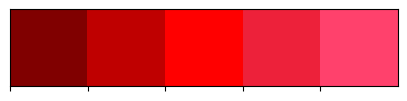

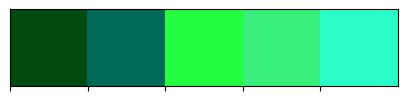

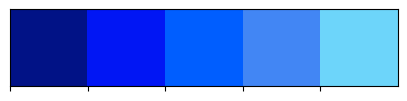

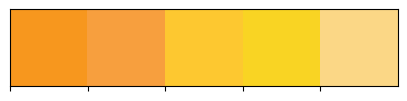

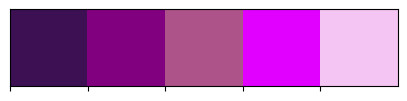

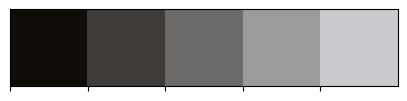

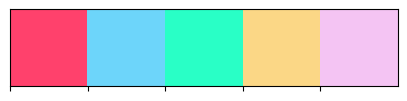

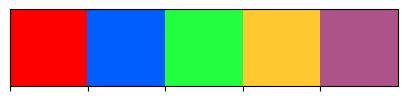

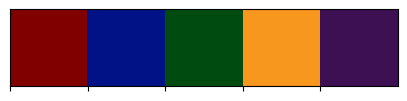

In [ ]:
# --- Create List of Color Gradient Palletes ---
red_grad = ['#800000', '#BF0000', '#FF0000', '#ED213A', '#FF416C']
green_grad = ['#004b0f', '#006957', '#24FE41', '#38ef7d', '#29ffc6']
blue_grad = ['#011286', '#0116f4', '#005EFF', '#4286f4', '#6DD5FA']
gold_grad = ['#F7971E', '#F79F3E', '#FDC830', '#F9D423', '#FBD786']
purple_grad = ['#3c1053', '#800080', '#ad5389' , '#E100FF', '#f4c4f3']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
color_mix_light = ['#FF416C', '#6DD5FA', '#29ffc6', '#FBD786', '#f4c4f3']
color_mix_medium = ['#FF0000', '#005EFF', '#24FE41', '#FDC830', '#ad5389']
color_mix_dark = ['#800000', '#011286', '#004b0f', '#F7971E', '#3c1053']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(green_grad)
sns.palplot(blue_grad)
sns.palplot(gold_grad)
sns.palplot(purple_grad)
sns.palplot(black_grad)
sns.palplot(color_mix_light)
sns.palplot(color_mix_medium)
sns.palplot(color_mix_dark)

In [ ]:
# Images augmentation function
def image_augmentation(train_df, val_df, test_df, IMG_SIZE, BATCH_SIZE, x_col=x_col, y_col=y_col, rescale=True,
                       horizontal_flip=True, rotation_range=20, zoom_range=0.2, shear_range=0.2,
                       width_shift_range=0.2, height_shift_range=0.2, class_mode=class_mode, shuffle=False):
  # Create train and validation datagen
  if rescale ==  True:
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       horizontal_flip=horizontal_flip,
                                       rotation_range=rotation_range,
                                       zoom_range=zoom_range,
                                       shear_range=shear_range,
                                       width_shift_range=width_shift_range,
                                       height_shift_range=height_shift_range)
    val_datagen = ImageDataGenerator(rescale=1/255.)
  else:
    train_datagen = ImageDataGenerator(horizontal_flip=horizontal_flip,
                                       rotation_range=rotation_range,
                                       zoom_range=zoom_range,
                                       shear_range=shear_range,
                                       width_shift_range=width_shift_range,
                                       height_shift_range=height_shift_range)

  # Flow from dataframe using datagen
  ds_train = train_datagen.flow_from_dataframe(train_df,
                                               # directory=train_path, #dataframe contains the full paths
                                               x_col=x_col,
                                               y_col=y_col,
                                               target_size=(IMG_SIZE, IMG_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode=class_mode,
                                               seed=SEED)

  ds_val = val_datagen.flow_from_dataframe(val_df,
                                           # directory=train_path,
                                           x_col=x_col,
                                           y_col=y_col,
                                           target_size=(IMG_SIZE, IMG_SIZE),
                                           batch_size=BATCH_SIZE,
                                           class_mode=class_mode,
                                           seed=SEED)

  ds_test = val_datagen.flow_from_dataframe(test_df,
                                            # directory=test_path,
                                            x_col=x_col,
                                            y_col=y_col,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=1,
                                            class_mode=class_mode,
                                            shuffle=shuffle)

  return ds_train, ds_val, ds_test

In [ ]:
# Hyperparameters tuning function
def hyperparam_tune_callbacks(BATCH_SIZE, initial_learning_rate=0.001, steps=4, decay_rate=0.95,
                              save_best_only=True, save_weights_only=True, early_stop_patience=5, plateau_patience=2,
                              monitor='val_loss', early_stop_min_delta=1e-7, plateau_min_delta=1e-7, cooldown=0,
                              restore_best_weights=True, best_weight="best_weights.h5"):
  # Defining our Checkpoints, EarlyStopping and ReduceLROnPlateau callbacks
  lr_schedule = ExponentialDecay(initial_learning_rate=initial_learning_rate,
                                decay_steps=BATCH_SIZE//steps,
                                decay_rate=decay_rate)
  checkpoint = ModelCheckpoint(best_weight, verbose=1, save_best_only=save_best_only, save_weights_only=save_weights_only)
  early_stopping = EarlyStopping(monitor=monitor,
                                patience=early_stop_patience,
                                min_delta=early_stop_min_delta,
                                restore_best_weights=restore_best_weights)
  plateau = ReduceLROnPlateau(monitor=monitor,
                              factor=0.2,
                              patience=plateau_patience,
                              min_delta=plateau_min_delta,
                              cooldown=cooldown,
                              verbose=1)

  return lr_schedule, checkpoint, early_stopping, plateau

In [ ]:
# Function used to get pretrained model
def get_pretrained(base_model):
  #Input shape = [width, height, color channels]
  inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

  x = base_model(inputs)

  # Head
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.1)(x)

  #Final Layer (Output)
  output = Dense(1, activation='sigmoid')(x)
  model = Model(inputs=[inputs], outputs=output)

  return model

In [ ]:
# Function used to get pretrained model
def get_pretrained_finetuned(base_model):
  #Input shape = [width, height, color channels]
  inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

  x = base_model(inputs)

  # Head
  x = BatchNormalization()(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.1)(x)

  #Final Layer (Output)
  output = Dense(1, activation='sigmoid')(x)
  model = Model(inputs=[inputs], outputs=output)

  return model

In [ ]:
def graph(Y_test, binary_prediction, prediction):
  # General Title
  fig.suptitle(f'Performance Evaluation Metrics', fontsize=16, fontweight='bold',
              fontfamily='sans-serif', color=black_grad[0])
  fig.subplots_adjust(top=0.9)

  # --- Performance Evaluation ---
  print("\n"+".: Performance Evaluation"+"")
  print("*" * 26)
  plt.figure(figsize=(4, 3))
  # Confusion Matrix
  confusion_matrix_tried = confusion_matrix(Y_test, binary_prediction)
  sns.heatmap(confusion_matrix_tried, annot=True, fmt="d")
  plt.xlabel("Predicted Label", fontsize=12)
  plt.ylabel("True Label", fontsize=12)

  # Classification Report
  print(classification_report(Y_test, binary_prediction, labels=[0, 1]))

  plt.figure(figsize=(9, 4))
  plt.subplot(1, 2, 1)
  # ROC AUC Curve
  roc_auc = roc_auc_score(Y_test, prediction)
  print('ROC_AUC: ', roc_auc)
  fpr, tpr, thresholds = roc_curve(Y_test, prediction)
  plt.plot(fpr, tpr, label='ROC_AUC = %0.3f' % roc_auc)
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate", fontsize=12)
  plt.ylabel("True Positive Rate", fontsize=12)
  plt.legend(loc="lower right")


  plt.subplot(1, 2, 2)
  # Precision Recall Curve
  precision, recall, threshold = precision_recall_curve(Y_test, prediction)
  auc_pc = auc(recall, precision)
  plt.plot(precision, recall, label='AUC = %0.3f' % auc_pc)
  plt.title("Precision Recall Curve")
  plt.xlabel("Recall", fontsize=12)
  plt.ylabel("Precision", fontsize=12)
  plt.legend(loc="lower left")

  plt.show()

In [ ]:
def prediction(df, num, IMG_SIZE, best_model):
  plt.figure(figsize=(8, 4))
  img = cv2.imread(df["image"][num])
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  img_label = df["class"][num]

  img_pred = np.expand_dims(img, axis=0)  # Add batch dimension
  img_pred = img_pred/255.0  # Normalize pixel values (assuming you did this during training)
  img_pred = best_model.predict(img_pred)
  print("Prediction score: ", img_pred)
  img_pred_label = np.where(img_pred>0.5, "Pneumonia", "Normal")[0][0]

  color_values = ((0, 255, 0) if img_label == "Normal"  else (255, 0, 0))
  color_valuess_pred = ((0, 255, 0) if img_pred_label == "Normal" else (255, 0, 0))

  cv2.putText(img, "Original result: "+img_label, (10, IMG_SIZE-30), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color_values, 1)
  cv2.putText(img, "Prediction result: "+img_pred_label, (10, IMG_SIZE-10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color_valuess_pred, 1)

  plt.imshow(img)
  plt.axis('off')
  plt.tight_layout()
  plt.show()

### Importing the Datasets

In [ ]:
train_normal = glob.glob(train_path + "/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path + "/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path + "/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path + "/PNEUMONIA/*.jpeg")

train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

train_df = pd.DataFrame(np.concatenate([['Normal']*len(train_normal), ['Pneumonia']*len(train_pneumonia)]), columns=['class'])
train_df['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

test_df = pd.DataFrame(np.concatenate([['Normal']*len(test_normal), ['Pneumonia']*len(test_pneumonia)]), columns=['class'])
test_df['image'] = [x for x in test_list]

In [ ]:
train_df

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
5227  Pneumonia   
5228  Pneumonia   
5229  Pneumonia   
5230  Pneumonia   
5231  Pneumonia   

                                                                                                    image  
0     /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/NORMAL/NORMAL-339692...  
1     /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/NORMAL/NORMAL-349337...  
2     /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/NORMAL/NORMAL-338872...  
3     /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/NORMAL/NORMAL-339958...  
4     /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/NORMAL/NORMAL-351436...  
...                                                                                                   ...  
5227  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/PNEUMONIA/BACTERIA-4...  
5228  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/PNEUMONIA/BACTERIA-4...  
5229  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/PNEUMONIA/BACTERIA-4...  
5230  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/PNEUMONIA/BACTERIA-4...  
5231  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/train/PNEUMONIA/BACTERIA-4...  

[5232 rows x 2 columns]

In [ ]:
test_df

class  \
0       Normal   
1       Normal   
2       Normal   
3       Normal   
4       Normal   
..         ...   
619  Pneumonia   
620  Pneumonia   
621  Pneumonia   
622  Pneumonia   
623  Pneumonia   

                                                                                                   image  
0    /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-1049278...  
1    /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-115218-...  
2    /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-1160949...  
3    /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-1110860...  
4    /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-11419-0...  
..                                                                                                   ...  
619  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/VIRUS-50693...  
620  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/VIRUS-74418...  
621  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/VIRUS-62494...  
622  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/VIRUS-84351...  
623  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/VIRUS-73852...  

[624 rows x 2 columns]

### Exploring the Data

> Let's check the target distribution on each set

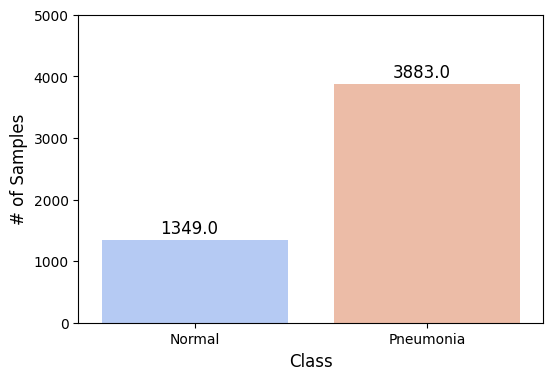

In [ ]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='class', data=train_df, palette='coolwarm')

plt.xlabel("Class", fontsize=12)
plt.ylabel("# of Samples", fontsize=12)
plt.ylim(0, 5000)
plt.xticks([0, 1], ['Normal', 'Pneumonia'], fontsize=10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+100), fontsize=12)

plt.show()

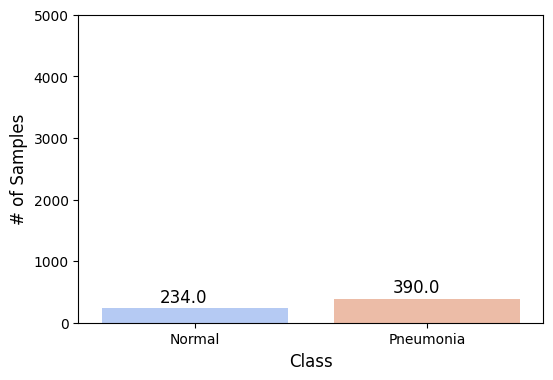

In [ ]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='class', data=test_df, palette='coolwarm')

plt.xlabel("Class", fontsize=12)
plt.ylabel("# of Samples", fontsize=12)
plt.ylim(0, 5000)
plt.xticks([0, 1], ['Normal', 'Pneumonia'], fontsize=10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+100), fontsize=12)

plt.show()

> * The distributions from the train datasets are highly imbalanced whereas the distributions from the test datasets are a little different from each other.

> * Before we move on to the next section, we will take a look at a few examples from each dataset.

Train Set - Normal


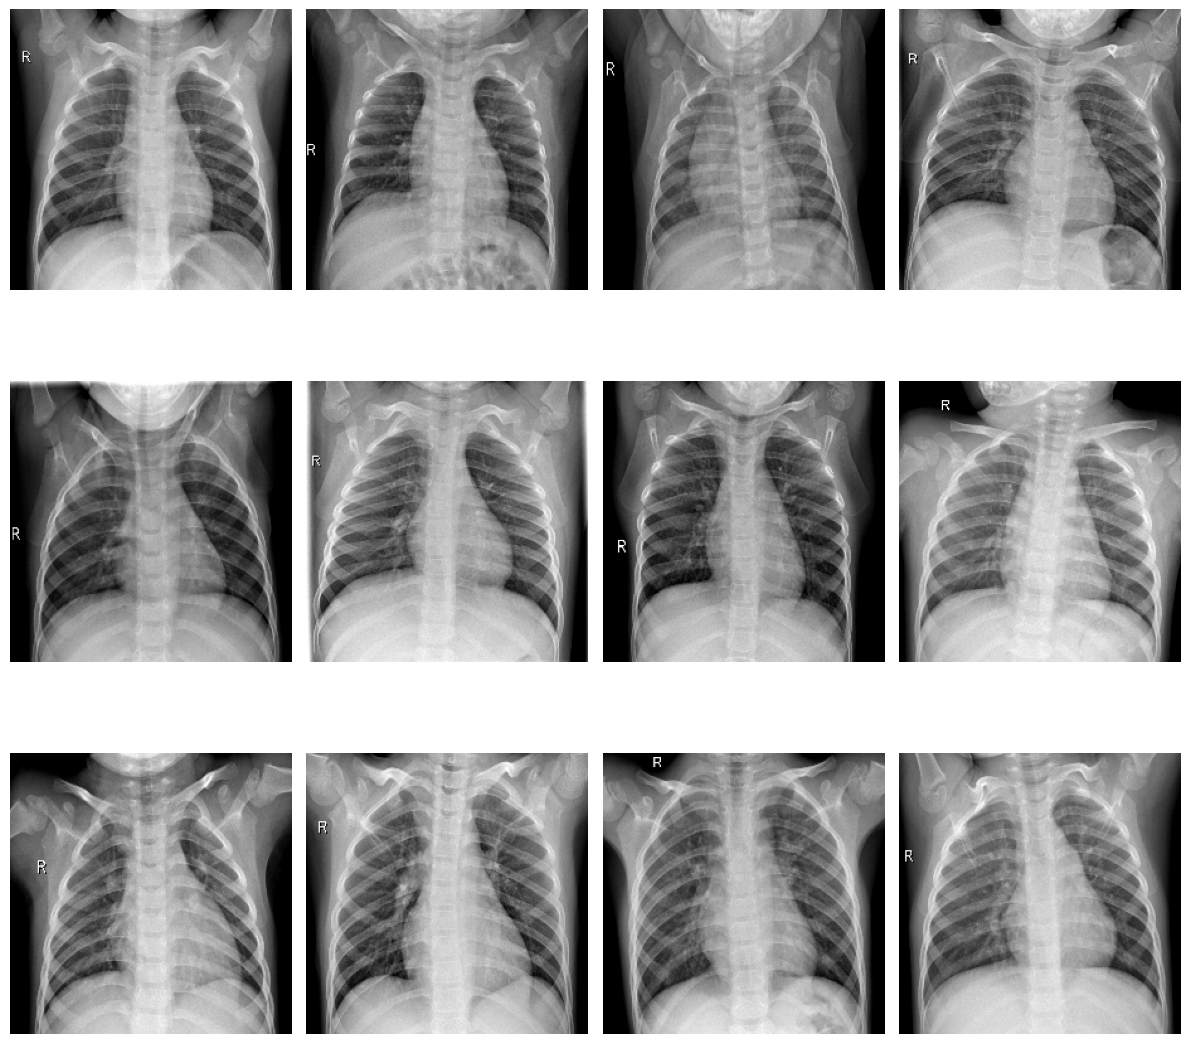

In [ ]:
print('Train Set - Normal')
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(3, 4, i+1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

Train Set - Pneumonia


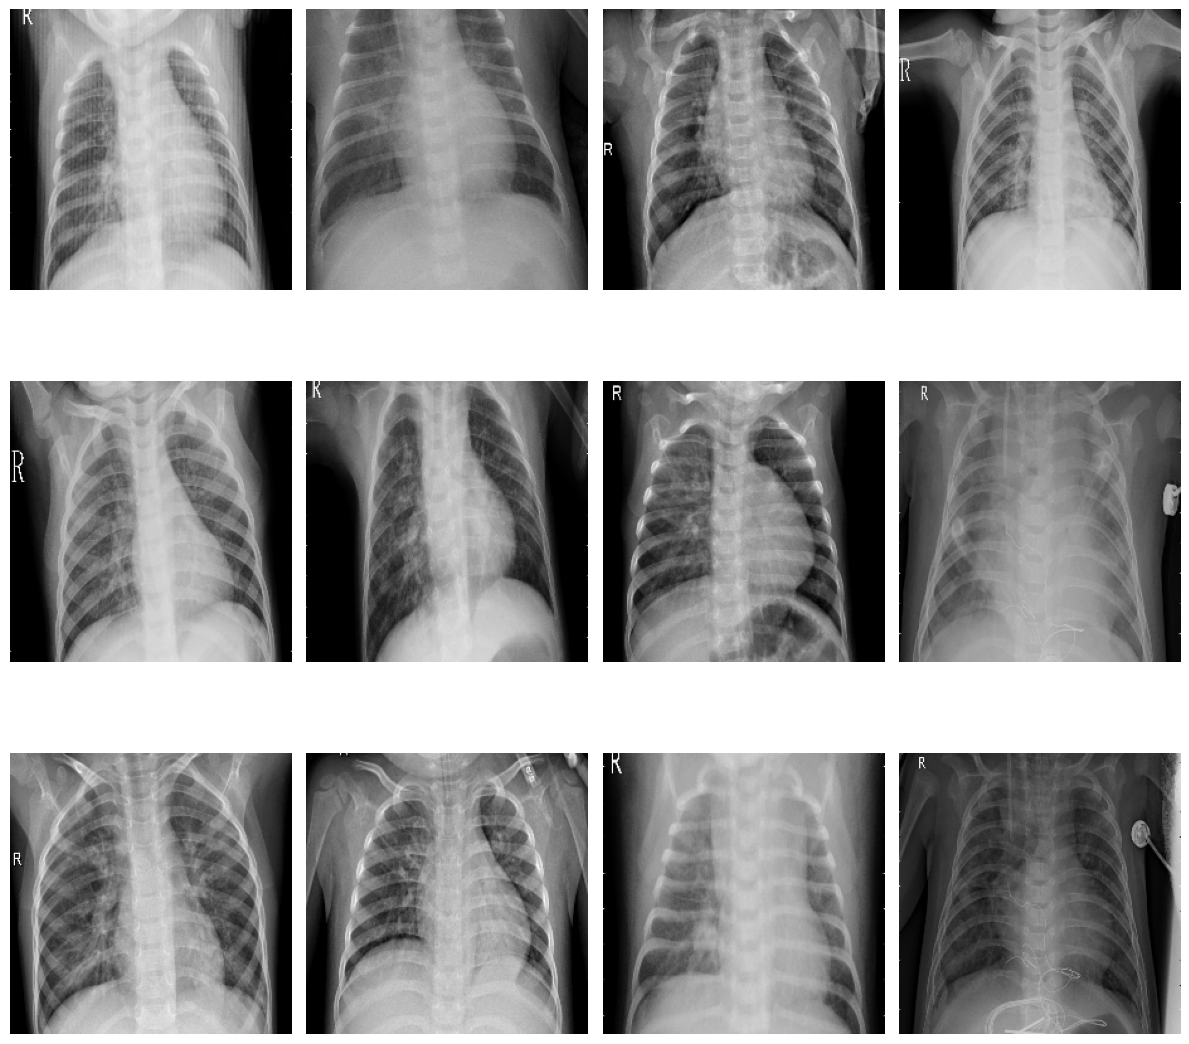

In [ ]:
print('Train Set - Pneumonia')
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(3, 4, i+1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

Test Set - Normal


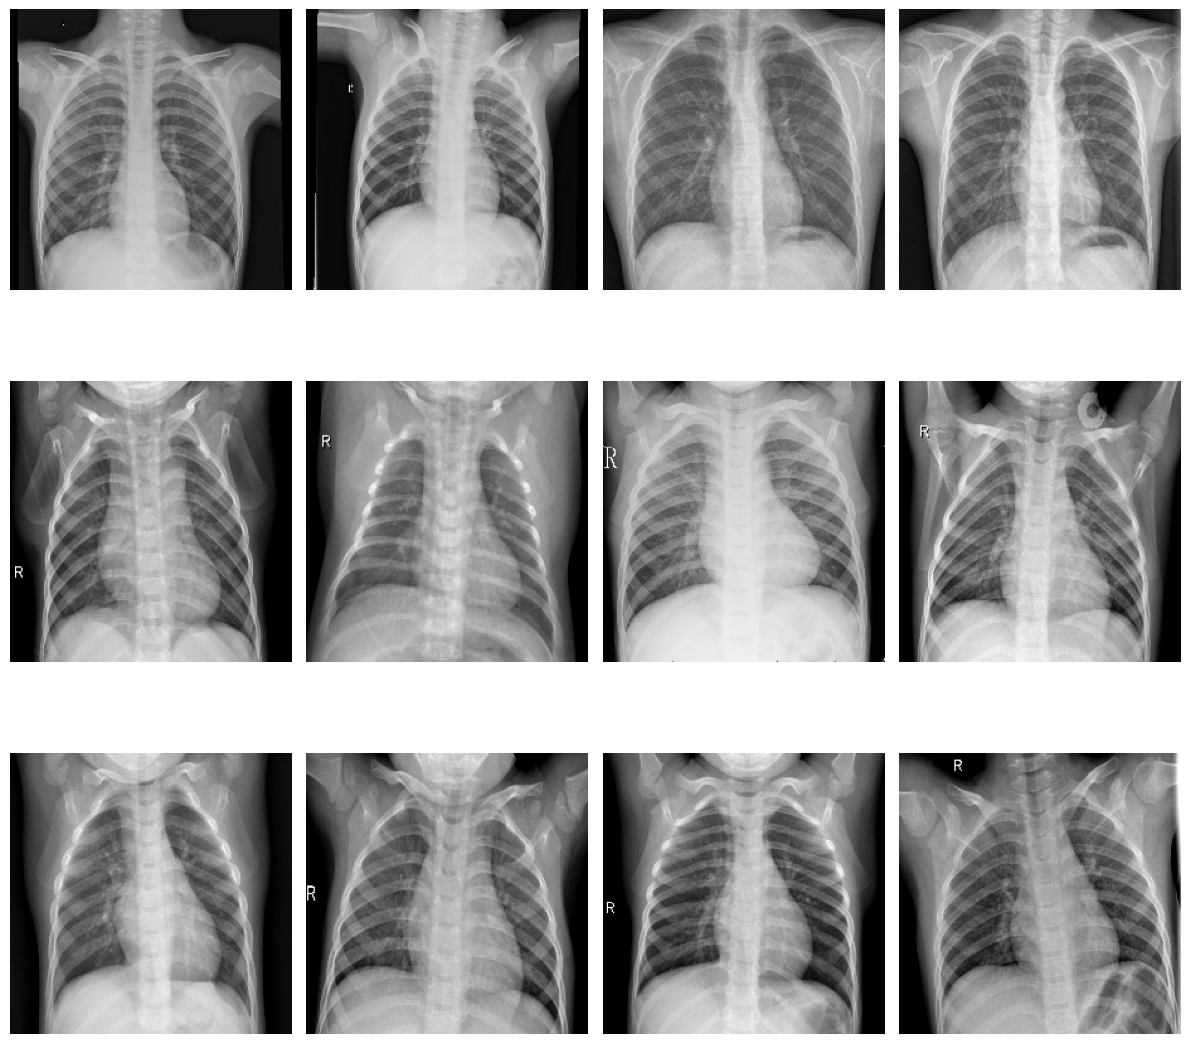

In [ ]:
print('Test Set - Normal')
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(3, 4, i+1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

Test Set - Pneumonia


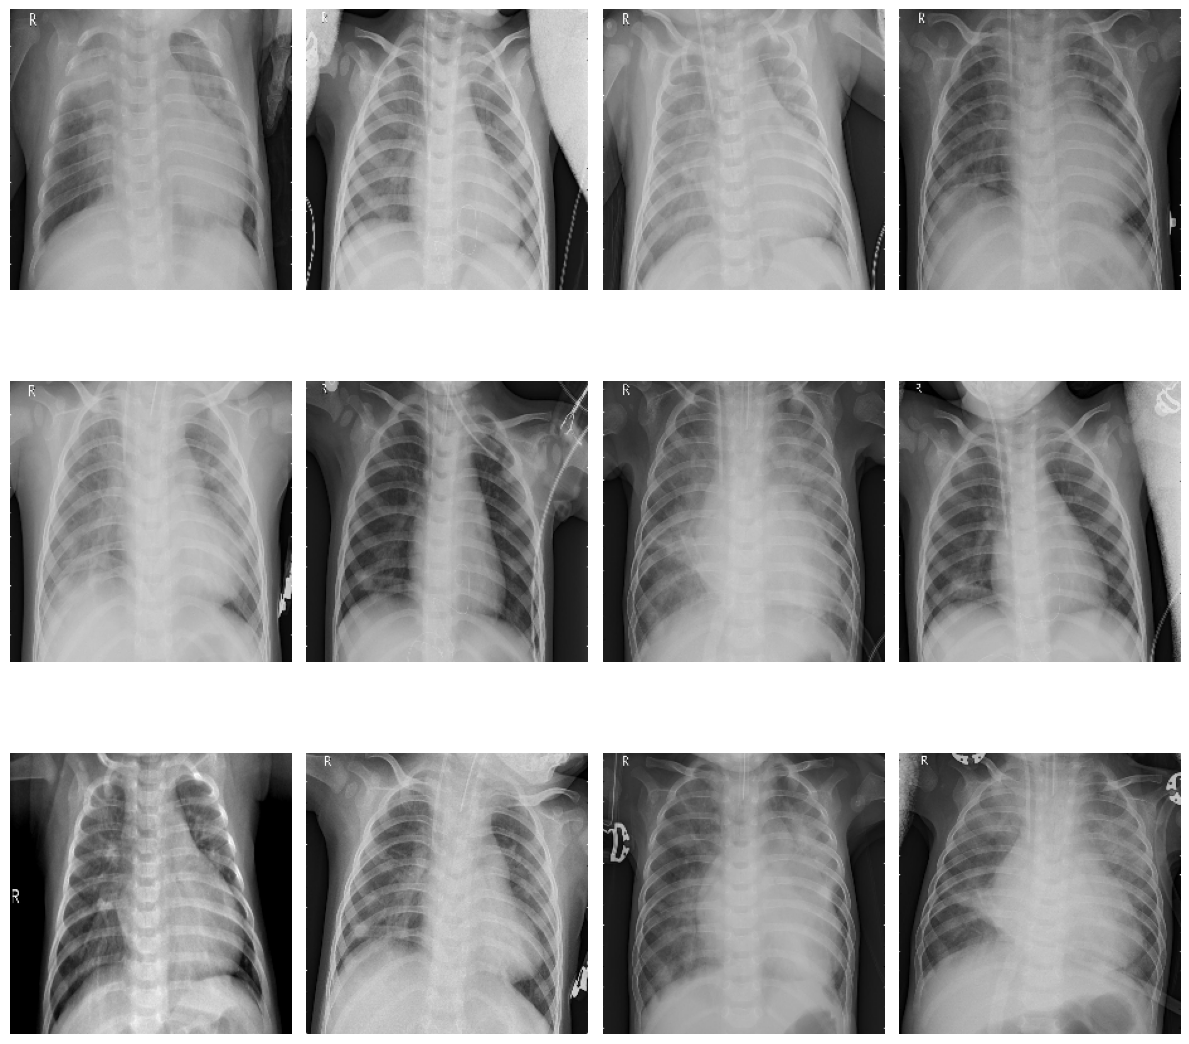

In [ ]:
print('Test Set - Pneumonia')
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(3, 4, i+1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Preparing the Data and Performing Image Augmentation

In [ ]:
# First, we need to create a validation set.
# To do that, we apply a simple stratified split on the original train dataset,
  # - using 80% for actual training and 20% for validation purposes.
train_ops_df, val_ops_df = train_test_split(train_df, test_size=0.2, random_state=SEED, stratify=train_df['class'])

### Model Training

##### 1st Approach: Pretrained with frozen base model weight

In [ ]:
ds_train_no_tuned, ds_val_no_tuned, ds_test_no_tuned = image_augmentation(train_ops_df, val_ops_df, test_df, IMG_SIZE, BATCH_SIZE_TRIED)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
# Defining our Checkpoints, EarlyStopping and ReduceLROnPlateau callbacks
lr_schedule_no_tuned, checkpoint_no_tuned, early_stopping_no_tuned, plateau_no_tuned = hyperparam_tune_callbacks(BATCH_SIZE_TRIED, best_weight="best_weights_no_tuned.h5")

In [ ]:
base_model_no_tuned = ResNet50V2(weights='imagenet',
                                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                 include_top=False)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
base_model_no_tuned.trainable = False

keras.backend.clear_session()
model_pretrained_no_tuned = get_pretrained(base_model_no_tuned)
model_pretrained_no_tuned.compile(loss='binary_crossentropy',
                                  optimizer=Adam(learning_rate=0.0001),
                                  metrics='binary_accuracy')
model_pretrained_no_tuned.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history_no_tuned = model_pretrained_no_tuned.fit(ds_train_no_tuned,
                                                 batch_size=BATCH_SIZE_TRIED,
                                                 epochs=EPOCH,
                                                 validation_data=ds_val_no_tuned,
                                                 callbacks=[checkpoint_no_tuned, early_stopping_no_tuned, plateau_no_tuned],
                                                 steps_per_epoch=(len(train_ops_df)/BATCH_SIZE_TRIED),
                                                 validation_steps=(len(val_ops_df)/BATCH_SIZE_TRIED));

Epoch 1/50
33/32 [==============================] - ETA: -9s - loss: 0.3822 - binary_accuracy: 0.8201
Epoch 1: val_loss improved from inf to 0.27788, saving model to best_weights_no_tuned.h5
32/32 [==============================] - 1244s 39s/step - loss: 0.3822 - binary_accuracy: 0.8201 - val_loss: 0.2779 - val_binary_accuracy: 0.9131 - lr: 1.0000e-04
Epoch 2/50
33/32 [==============================] - ETA: -1s - loss: 0.2412 - binary_accuracy: 0.8968
Epoch 2: val_loss improved from 0.27788 to 0.21710, saving model to best_weights_no_tuned.h5
32/32 [==============================] - 197s 6s/step - loss: 0.2412 - binary_accuracy: 0.8968 - val_loss: 0.2171 - val_binary_accuracy: 0.9265 - lr: 1.0000e-04
Epoch 3/50
33/32 [==============================] - ETA: -1s - loss: 0.2061 - binary_accuracy: 0.9173
Epoch 3: val_loss improved from 0.21710 to 0.20912, saving model to best_weights_no_tuned.h5
32/32 [==============================] - 197s 6s/step - loss: 0.2061 - binary_accuracy: 0.9173 

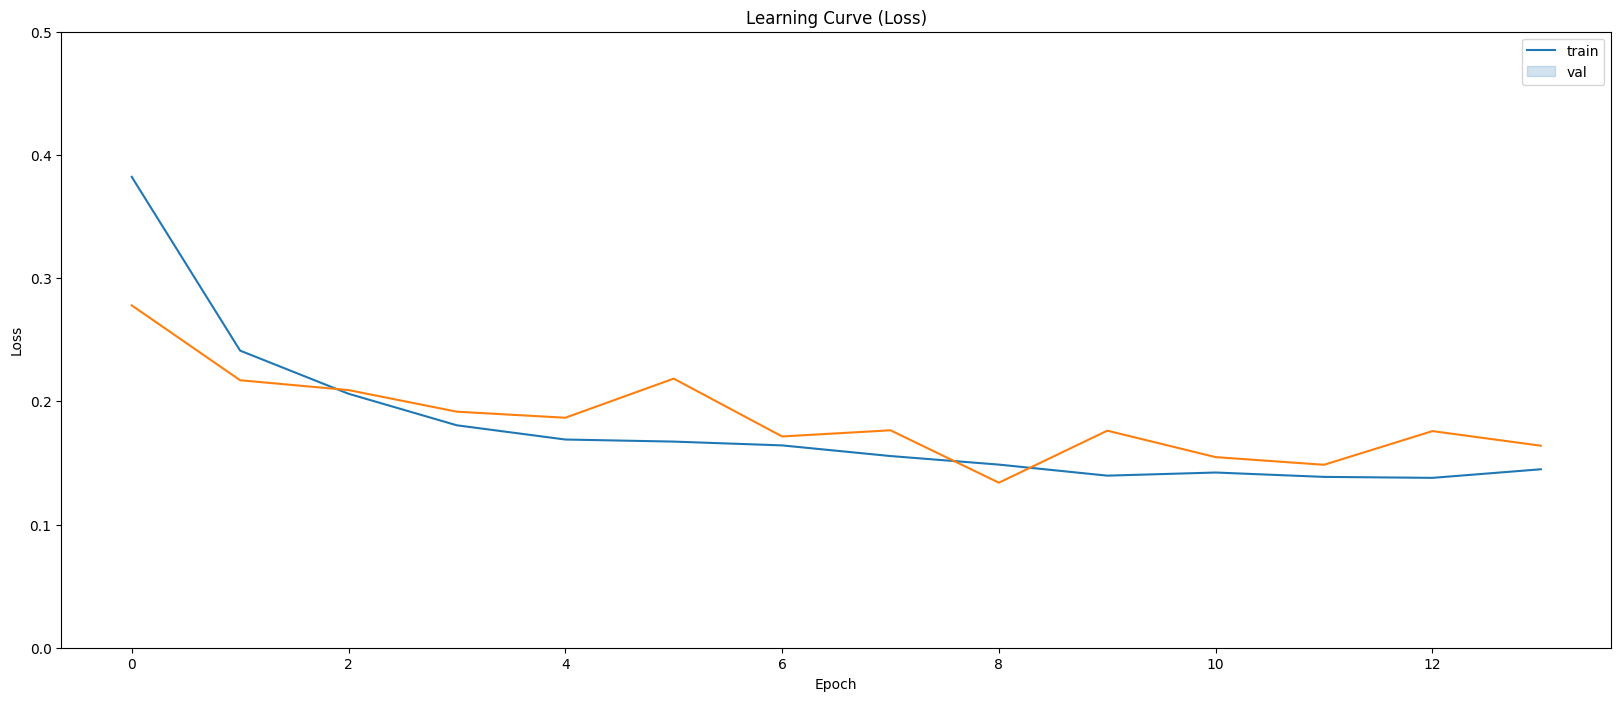

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history_no_tuned.epoch, y=history_no_tuned.history['loss'])
sns.lineplot(x=history_no_tuned.epoch, y=history_no_tuned.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

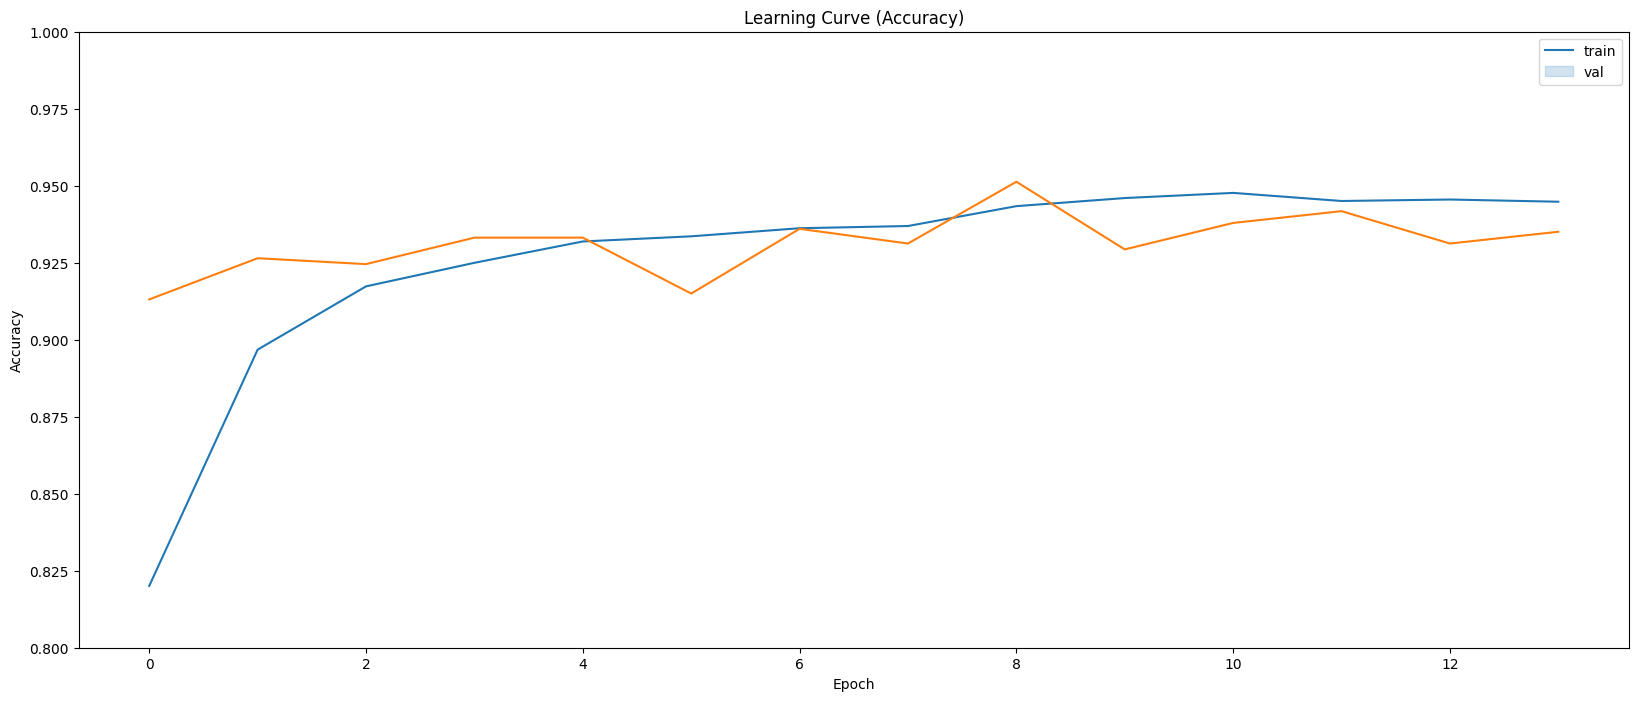

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history_no_tuned.epoch, y=history_no_tuned.history['binary_accuracy'])
sns.lineplot(x=history_no_tuned.epoch, y=history_no_tuned.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
train_score_no_tuned = model_pretrained_no_tuned.evaluate(ds_train_no_tuned,
                                                          steps=len(train_ops_df)/BATCH_SIZE_TRIED,
                                                          verbose = 0)
print('Train loss:', train_score_no_tuned[0])
print('Train accuracy:', train_score_no_tuned[1])

Train loss: 0.15358752012252808
Train accuracy: 0.9395459890365601


In [ ]:
val_score_no_tuned = model_pretrained_no_tuned.evaluate(ds_val_no_tuned,
                                                        steps=len(val_ops_df)/BATCH_SIZE_TRIED,
                                                        verbose = 0)
print('Val loss:', val_score_no_tuned[0])
print('Val accuracy:', val_score_no_tuned[1])

Val loss: 0.13394424319267273
Val accuracy: 0.9512894153594971


##### 2nd Approach: Pretrained with fine tuning trainable fully connected layers

In [ ]:
ds_train_best, ds_val_best, ds_test_best = image_augmentation(train_ops_df, val_ops_df, test_df, IMG_SIZE, BATCH_SIZE_BEST)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
lr_schedule_best, checkpoint_best, early_stopping_best, plateau_best = hyperparam_tune_callbacks(BATCH_SIZE_BEST, initial_learning_rate=0.001, early_stop_patience=15, plateau_patience=5, best_weight="best_weights_tuned.h5")

In [ ]:
base_model_best = ResNet50V2(weights='imagenet',
                             input_shape=(IMG_SIZE, IMG_SIZE, 3),
                             include_top=False)

In [ ]:
base_model_best.trainable = True
keras.backend.clear_session()

model_pretrained_best = get_pretrained_finetuned(base_model_best)

# Freeze all layers except for the
for layer in base_model_best.layers[:-25]:
    layer.trainable = False

# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_best.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [ ]:
model_pretrained_best.compile(loss='binary_crossentropy',
                              optimizer=Adam(learning_rate=lr_schedule_best, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                              metrics='binary_accuracy')

model_pretrained_best.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0     

In [ ]:
history_best = model_pretrained_best.fit(ds_train_best,
                                         batch_size=BATCH_SIZE_BEST,
                                         epochs=EPOCH,
                                         validation_data=ds_val_best,
                                         callbacks=[checkpoint_best, early_stopping_best, plateau_best],
                                         steps_per_epoch=(len(train_ops_df)/BATCH_SIZE_BEST),
                                         validation_steps=(len(val_ops_df)/BATCH_SIZE_BEST));

Epoch 1/50
131/130 [==============================] - ETA: 0s - loss: 0.1888 - binary_accuracy: 0.9271
Epoch 1: val_loss improved from inf to 2.52648, saving model to best_weights_tuned.h5
130/130 [==============================] - 235s 2s/step - loss: 0.1888 - binary_accuracy: 0.9271 - val_loss: 2.5265 - val_binary_accuracy: 0.7708 - lr: 4.3452e-04
Epoch 2/50
131/130 [==============================] - ETA: 0s - loss: 0.1183 - binary_accuracy: 0.9546
Epoch 2: val_loss improved from 2.52648 to 0.14145, saving model to best_weights_tuned.h5
130/130 [==============================] - 246s 2s/step - loss: 0.1183 - binary_accuracy: 0.9546 - val_loss: 0.1414 - val_binary_accuracy: 0.9475 - lr: 1.8760e-04
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.0913 - binary_accuracy: 0.9682
Epoch 3: val_loss improved from 0.14145 to 0.09530, saving model to best_weights_tuned.h5
130/130 [==============================] - 242s 2s/step - loss: 0.0913 - binary_accuracy: 0.9682 - 

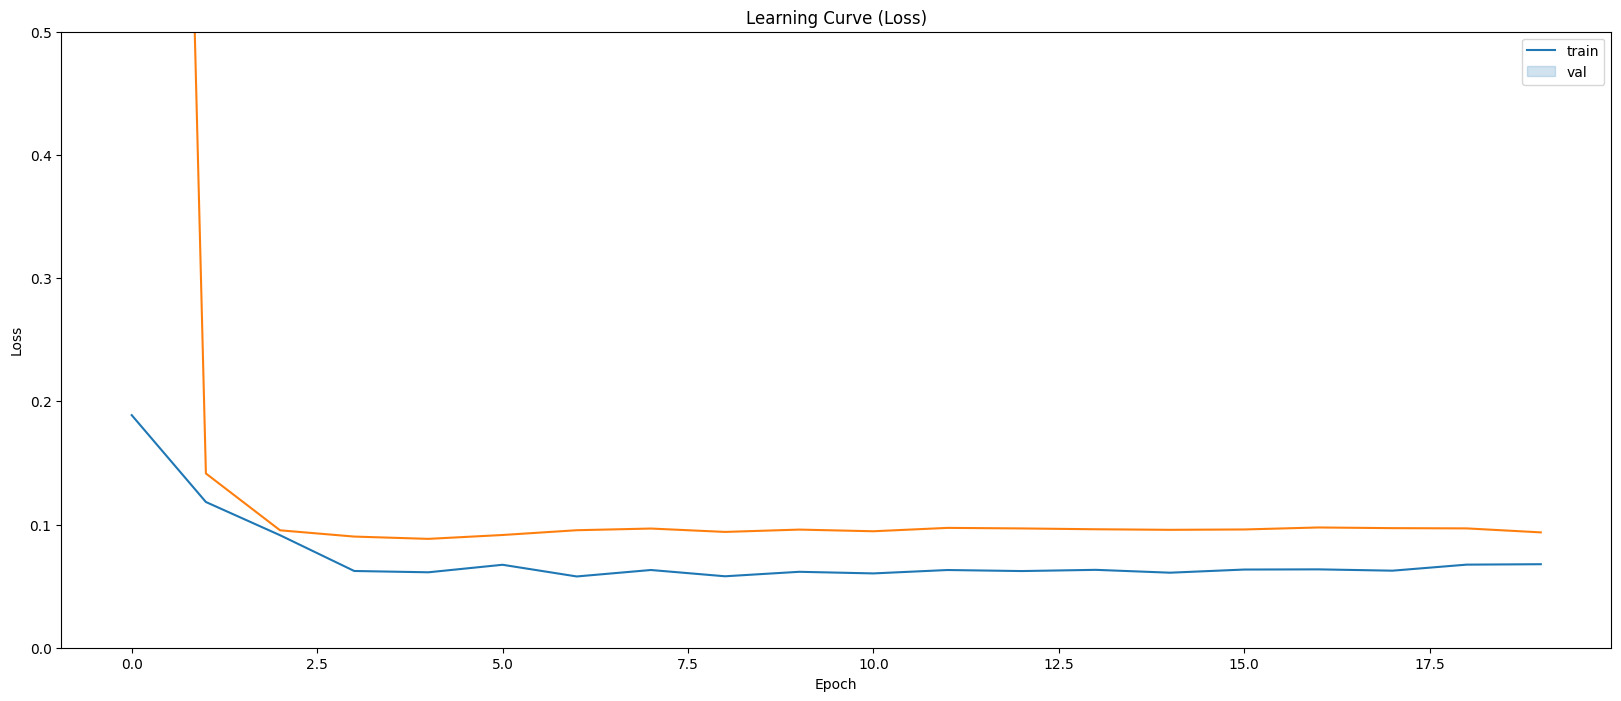

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history_best.epoch, y=history_best.history['loss'])
sns.lineplot(x=history_best.epoch, y=history_best.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

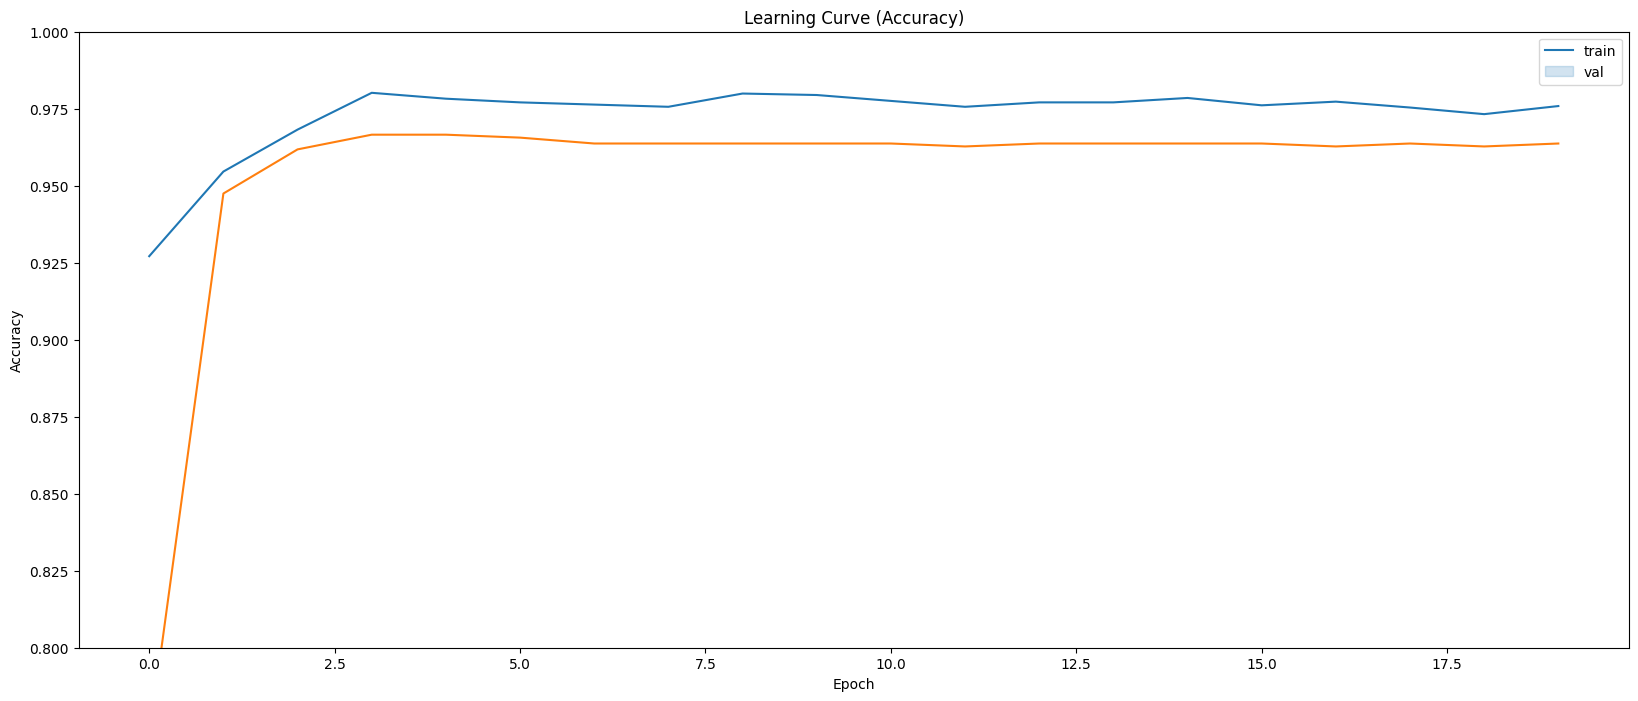

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=history_best.epoch, y=history_best.history['binary_accuracy'])
sns.lineplot(x=history_best.epoch, y=history_best.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
train_score_best = model_pretrained_best.evaluate(ds_train_best,
                                                  steps=len(train_ops_df),
                                                  verbose=0)
print('Train loss:', train_score_best[0])
print('Train accuracy:', train_score_best[1])

Train loss: 0.05316350981593132
Train accuracy: 0.9794504046440125


In [ ]:
val_score_best = model_pretrained_best.evaluate(ds_val_best,
                                                steps=len(val_ops_df)/BATCH_SIZE_BEST,
                                                verbose=0)
print('Val loss:', val_score_best[0])
print('Val accuracy:', val_score_best[1])

Val loss: 0.08835294842720032
Val accuracy: 0.9665711522102356


> * As expected, the fine-tuning approach has reached the best score.
> * Both 1st approach and 2nd approach trained models are quite generalized as their the differences between train loss and validation loss are small.
> * We end this notebook by showing a few performance metrics.

### Outputting Models

In [ ]:
model_pretrained_no_tuned.load_weights("best_weights_no_tuned.h5")

# Pickle dump the model
with open('pretrained_resnet50v2_no_tuned.pkl', 'wb') as f1:
    pickle.dump(model_pretrained_no_tuned, f1)

In [ ]:
model_pretrained_best.load_weights("best_weights_tuned.h5")

# Pickle dump the model
with open('pretrained_resnet50v2_best.pkl', 'wb') as f2:
    pickle.dump(model_pretrained_best, f2)

### Model Evaluation (Performance Metrics)

> 1st Approach Prediction and Metrics:

In [ ]:
Y_test_no_tuned = test_df['class'].copy().map(num_label).astype('int')
ds_test_no_tuned.reset()

In [ ]:
model_no_tuned = pickle.load(open('pretrained_resnet50v2_no_tuned.pkl', 'rb'))

In [ ]:
predictions_no_tuned = model_no_tuned.predict(ds_test_no_tuned, steps=len(ds_test_no_tuned), verbose=0)
pred_labels_no_tuned = np.where(predictions_no_tuned>0.5, 1, 0)
print(f"Test Accuracy: {round((accuracy_score(Y_test_no_tuned, pred_labels_no_tuned)*100), 2)}%")
print(f"Test F1 Score: {round((f1_score(Y_test_no_tuned, pred_labels_no_tuned)*100), 2)}%")

Test Accuracy: 92.31%
Test F1 Score: 94.0%



.: Performance Evaluation
**************************
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       234
           1       0.92      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624

ROC_AUC:  0.976813499890423


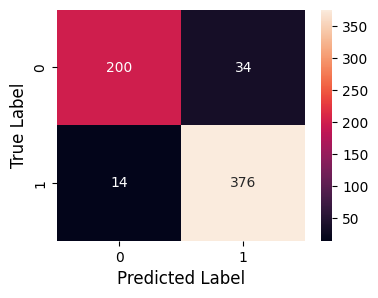

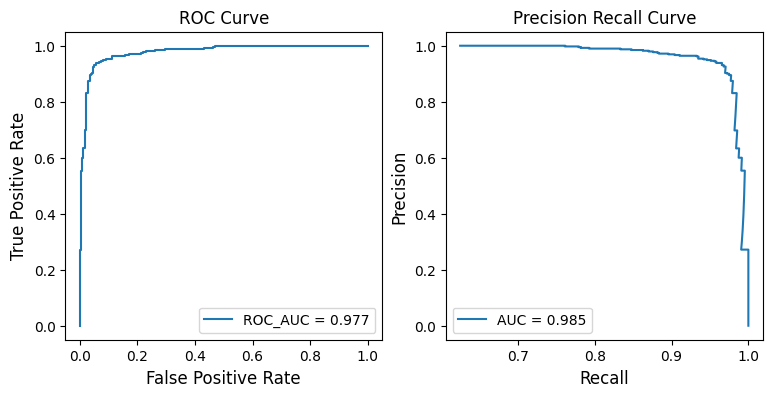

In [ ]:
graph(Y_test_no_tuned, pred_labels_no_tuned, predictions_no_tuned)

> 2nd Approach Prediction and Metrics:

In [ ]:
Y_test_best = test_df['class'].copy().map(num_label).astype('int')
ds_test_best.reset()

In [ ]:
best_model = pickle.load(open('pretrained_resnet50v2_best.pkl', 'rb'))

In [ ]:
predictions_best = best_model.predict(ds_test_best, steps=len(ds_test_best), verbose=0)
pred_labels_best = np.where(predictions_best>0.5, 1, 0)
print(f"Test Accuracy: {round((accuracy_score(Y_test_best, pred_labels_best)*100), 2)}%")
print(f"Test F1 Score: {round((f1_score(Y_test_best, pred_labels_best)*100), 2)}%")

Test Accuracy: 96.96%
Test F1 Score: 97.59%



.: Performance Evaluation
**************************
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       234
           1       0.96      0.99      0.98       390

    accuracy                           0.97       624
   macro avg       0.97      0.96      0.97       624
weighted avg       0.97      0.97      0.97       624

ROC_AUC:  0.9916831032215647


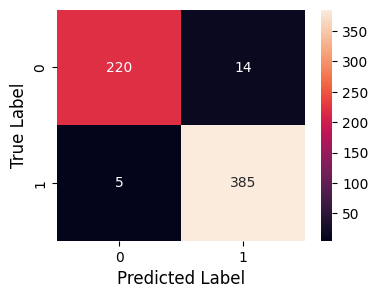

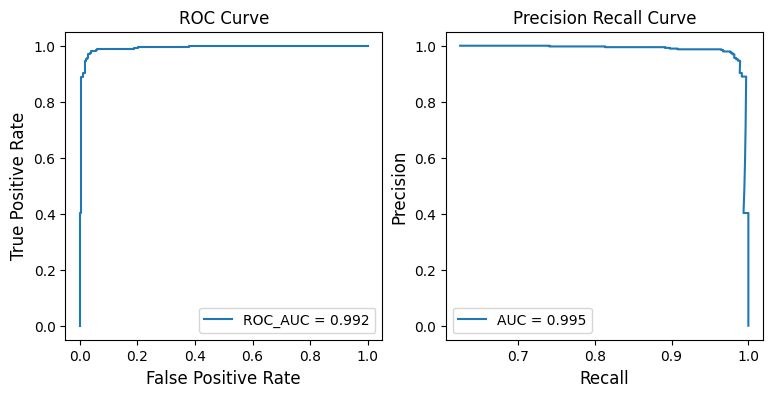

In [ ]:
graph(Y_test_best, pred_labels_best, predictions_best)

* The 2nd approach obviously outperform 1st approach.
* The recall was close to 100%.
* Even without expertise on the medical field, it's reasonable to assume that false negatives are more 'costly' than false positives in this case.
* Reaching such recall with a relatively small dataset for training as this one, while also reaching a pretty good recall, is a good indicative of the model's capabilities.
* Such capabilities are also confirmed by the high ROC-AUC value and double confirm using precision recall curve under AUC for this small and unbalanced dataset.

### Model Predictions

In [ ]:
df_test_normal = test_df[test_df["class"]=="Normal"].copy()
df_test_normal.sample(3)

class  \
41  Normal   
18  Normal   
50  Normal   

                                                                                                  image  
41  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-2578531...  
18  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-1858497...  
50  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/NORMAL/NORMAL-2477476...

In [ ]:
df_test_pneumonia = test_df[test_df["class"]=="Pneumonia"].copy()
df_test_pneumonia.sample(3)

class  \
462  Pneumonia   
390  Pneumonia   
238  Pneumonia   

                                                                                                   image  
462  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/BACTERIA-92...  
390  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/BACTERIA-69...  
238  /content/gdrive/MyDrive/0.Projects/@b.ImageDataset/chest_xray_dataset/test/PNEUMONIA/BACTERIA-11...

1/1 [==============================] - 0s 70ms/step
Prediction score:  [[0.02088018]]


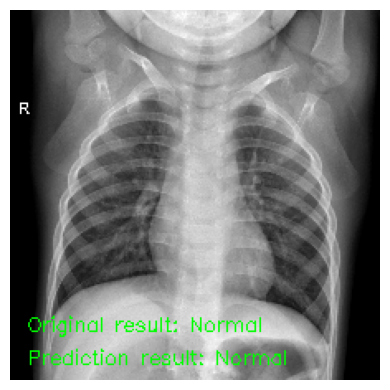

In [ ]:
prediction(df_test_normal, 50, IMG_SIZE, best_model)

1/1 [==============================] - 0s 70ms/step
Prediction score:  [[0.9998757]]


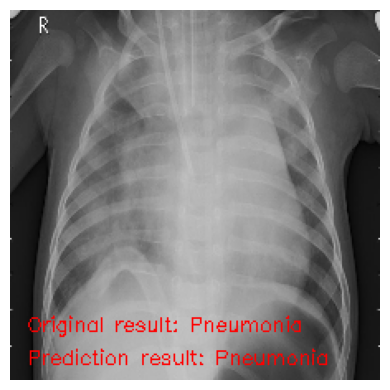

In [ ]:
prediction(df_test_pneumonia, 462, IMG_SIZE, best_model)